In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.490909091


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.604727,0.605700,0.510508,0.620340,0.504229,0.635122,0.510406,0.629262,0.494641,0.570318,0.437922,0.629057,0.503970,2.220000
std,0.115566,0.264150,0.156355,0.225349,0.167108,0.221827,0.174169,0.230749,0.182911,0.185639,0.190455,0.181546,0.187579,1.183043
min,0.496970,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.527273,0.443726,0.398749,0.510717,0.401366,0.539952,0.422246,0.531346,0.426771,0.500000,0.312996,0.550930,0.418180,1.000000
50%,0.554545,0.567308,0.512742,0.651053,0.534602,0.624770,0.521687,0.603422,0.497683,0.601422,0.464278,0.630999,0.511549,2.000000
75%,0.642424,0.815416,0.632442,0.734756,0.615321,0.755718,0.588585,0.780133,0.557253,0.676146,0.534373,0.696621,0.564906,3.000000
max,0.987879,1.000000,0.844141,1.000000,0.793388,1.000000,0.893224,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 3-mo (Treasury)   50.0  0.605700  0.264150  0.037356   
 2                         combined  100.0  0.605214  0.202844  0.020284   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.530629  0.680770  
 2   0.564965  0.645462  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...  -0.0010
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.0239
 3                           Two side test p value =    0.9810
 4                          Difference < 0 p value =    0.4905
 5                          Difference > 0 p value =    0.5095
 6                                       Cohen's d =   -0.0048
 7                                       Hedge's g =   -0.0047
 8                    

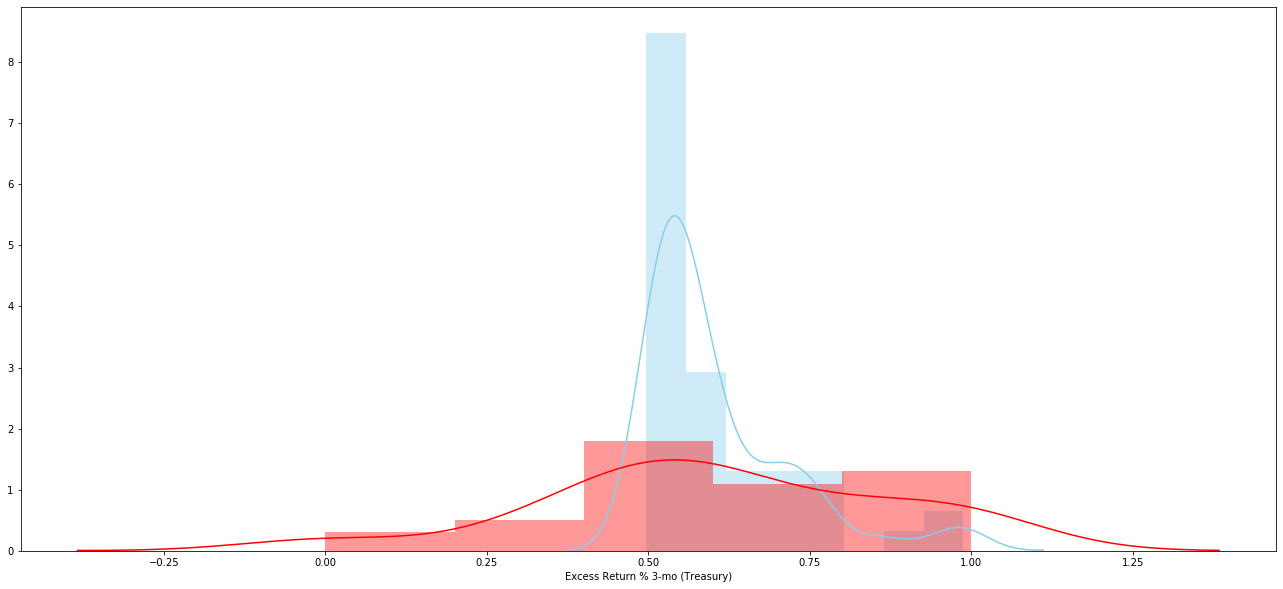

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 3-mo (Agg)   50.0  0.510508  0.156355  0.022112   0.466073   
 2                    combined  100.0  0.557618  0.144748  0.014475   0.528897   
 
    Interval  
 0  0.637571  
 1  0.554944  
 2  0.586339  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.0942
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.4266
 3                          Two side test p value =    0.0009
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    0.6853
 7                                      Hedge's g =    0.6801
 8                                  Glass's delta =

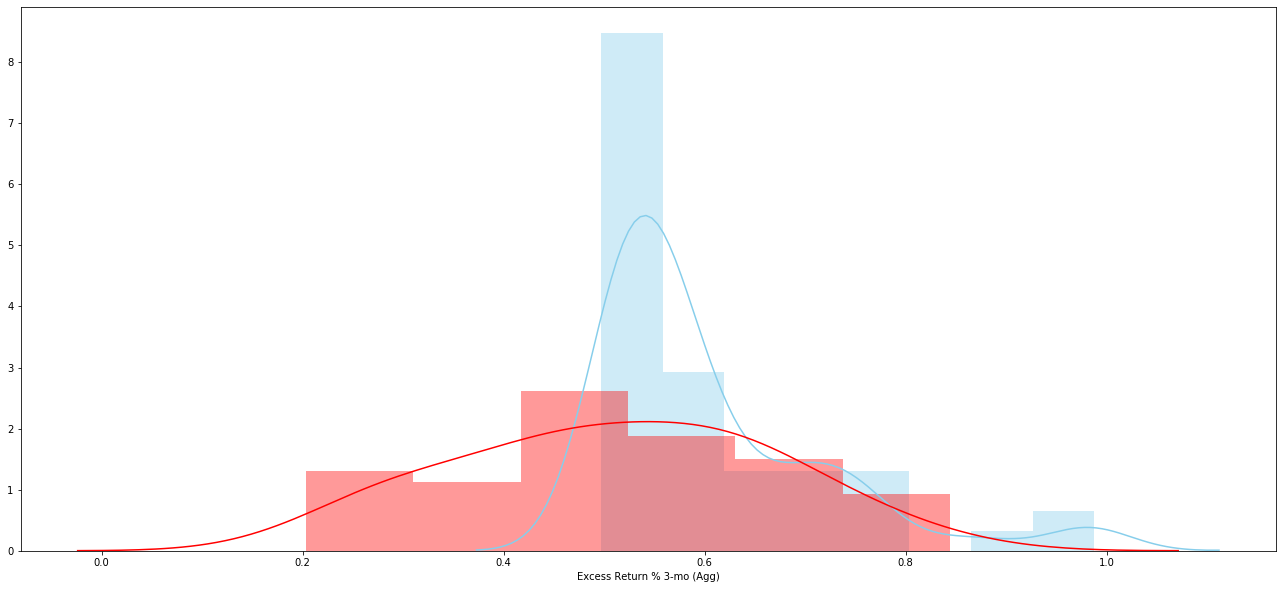

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 6-mo (Treasury)   50.0  0.620340  0.225349  0.031869   
 2                         combined  100.0  0.612534  0.178344  0.017834   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.556296  0.684383  
 2   0.577146  0.647921  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...  -0.0156
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.4359
 3                           Two side test p value =    0.6639
 4                          Difference < 0 p value =    0.3319
 5                          Difference > 0 p value =    0.6681
 6                                       Cohen's d =   -0.0872
 7                                       Hedge's g =   -0.0865
 8                    

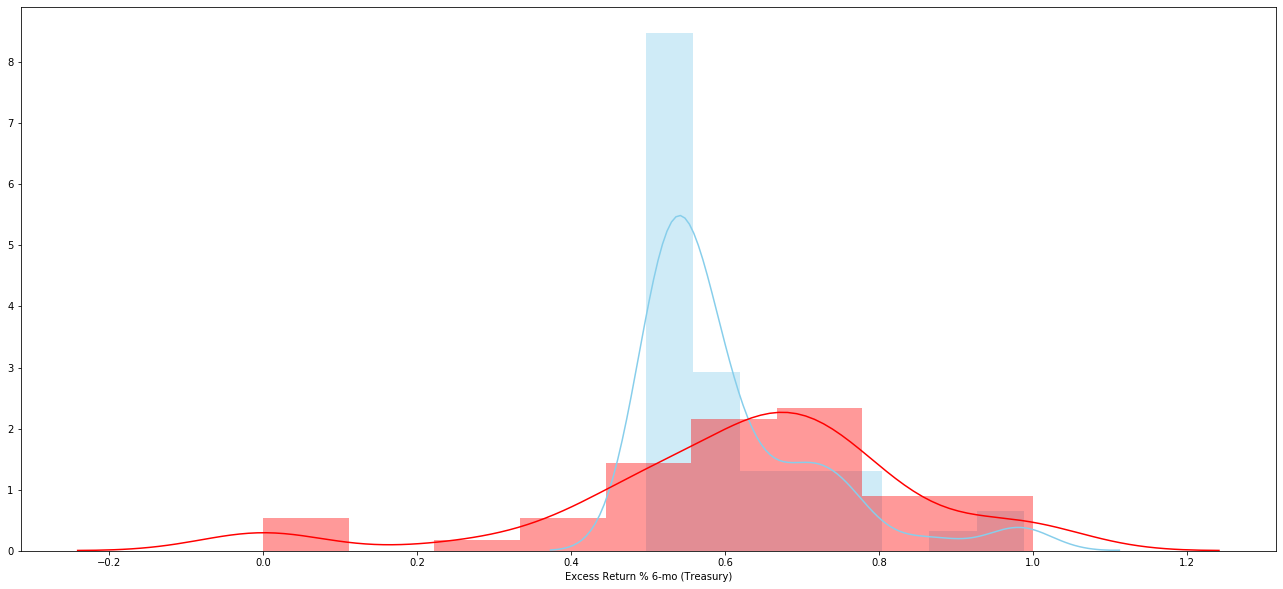

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 6-mo (Agg)   50.0  0.504229  0.167108  0.023633   0.456737   
 2                    combined  100.0  0.554478  0.151599  0.015160   0.524398   
 
    Interval  
 0  0.637571  
 1  0.551720  
 2  0.584559  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1005
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.4976
 3                          Two side test p value =    0.0007
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    0.6995
 7                                      Hedge's g =    0.6942
 8                                  Glass's delta =

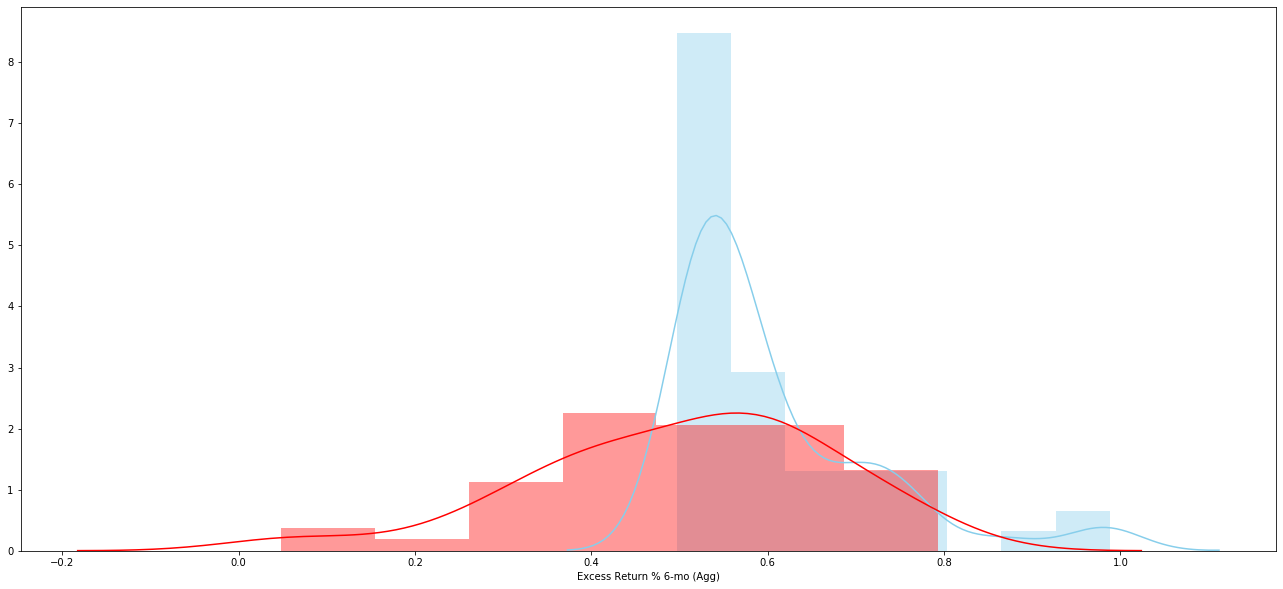

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 9-mo (Treasury)   50.0  0.635122  0.221827  0.031371   
 2                         combined  100.0  0.619925  0.176631  0.017663   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.572080  0.698165  
 2   0.584877  0.654972  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...  -0.0304
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.8593
 3                           Two side test p value =    0.3923
 4                          Difference < 0 p value =    0.1961
 5                          Difference > 0 p value =    0.8039
 6                                       Cohen's d =   -0.1719
 7                                       Hedge's g =   -0.1705
 8                    

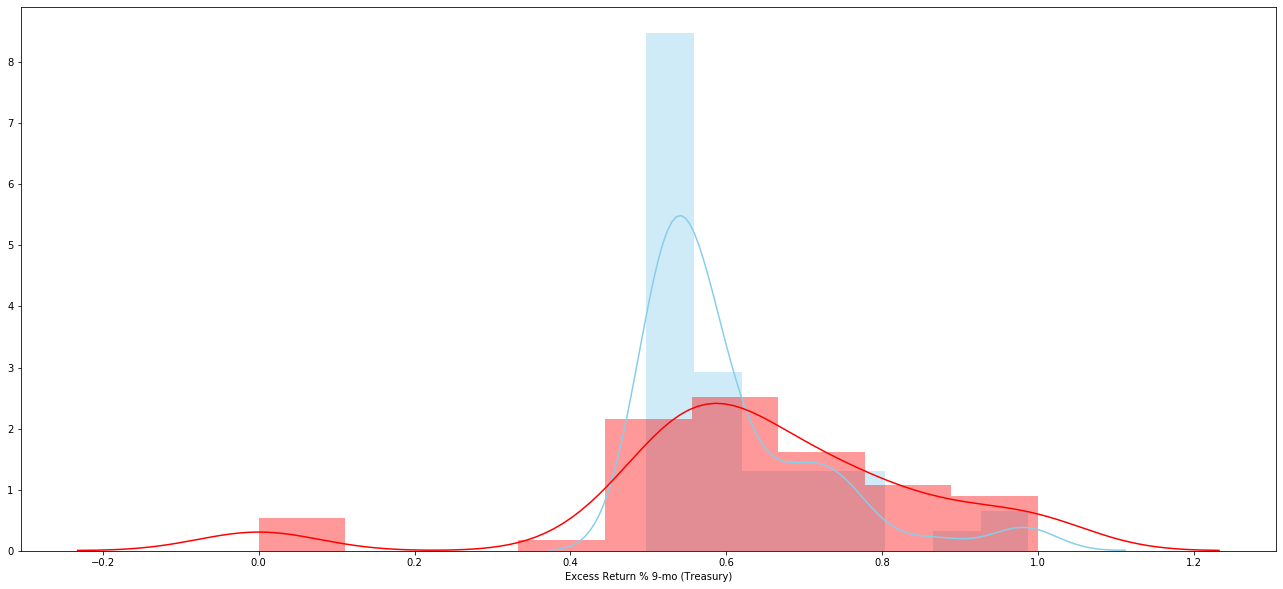

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 9-mo (Agg)   50.0  0.510406  0.174169  0.024631   0.460908   
 2                    combined  100.0  0.557567  0.154503  0.015450   0.526910   
 
    Interval  
 0  0.637571  
 1  0.559904  
 2  0.588223  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.0943
 1                             Degrees of freedom =   98.0000
 2                                              t =    3.1908
 3                          Two side test p value =    0.0019
 4                         Difference < 0 p value =    0.9990
 5                         Difference > 0 p value =    0.0010
 6                                      Cohen's d =    0.6382
 7                                      Hedge's g =    0.6333
 8                                  Glass's delta =

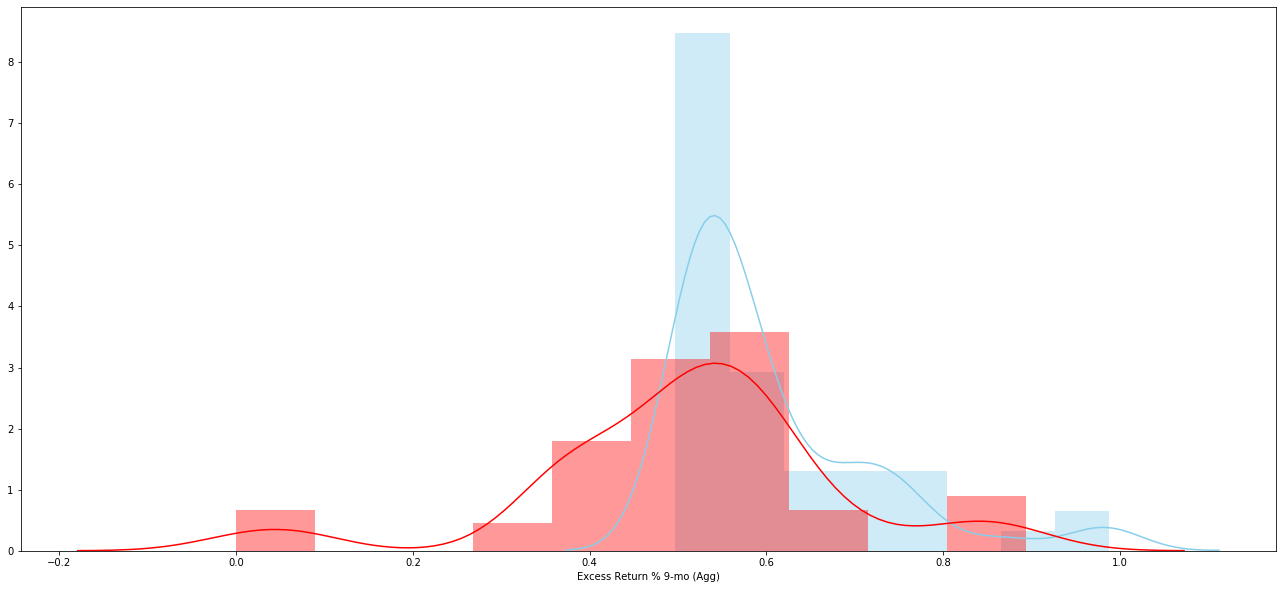

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Treasury)   50.0  0.629262  0.230749  0.032633   
 2                          combined  100.0  0.616995  0.181978  0.018198   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.563684  0.694840  
 2   0.580886  0.653103  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...  -0.0245
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.6722
 3                           Two side test p value =    0.5030
 4                          Difference < 0 p value =    0.2515
 5                          Difference > 0 p value =    0.7485
 6                                       Cohen's d =   -0.1344
 7                                       Hedge's g =   -0.1334
 8                

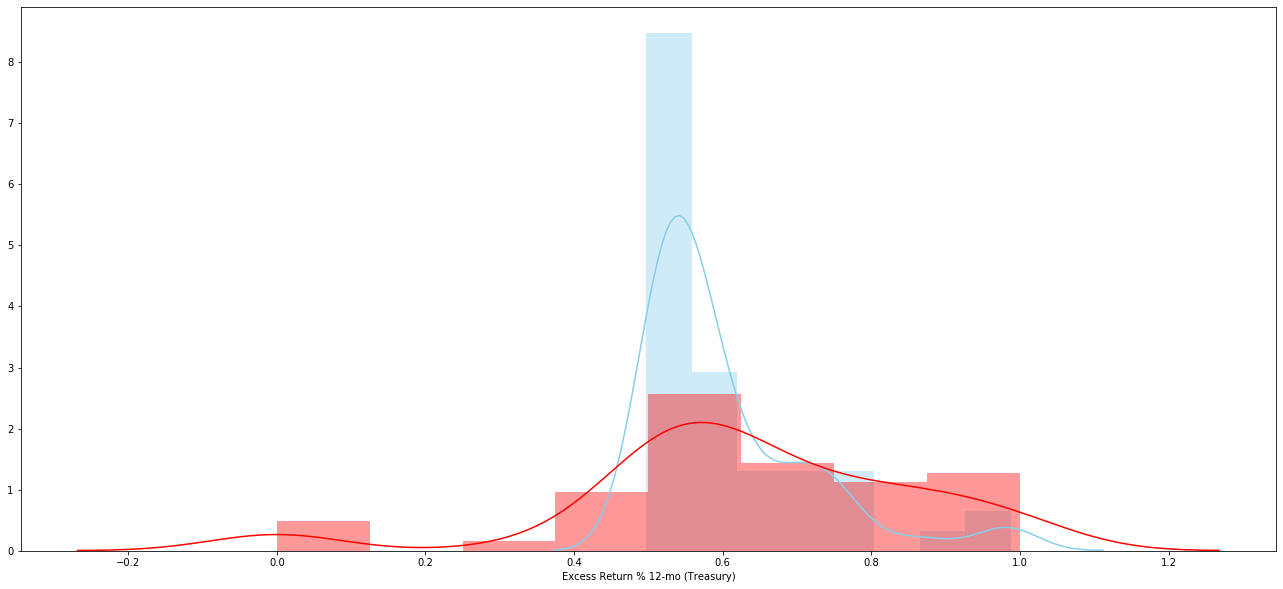

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Agg)   50.0  0.494641  0.182911  0.025868   
 2                     combined  100.0  0.549684  0.161957  0.016196   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.442659  0.546624  
 2   0.517549  0.581820  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1101
 1                              Degrees of freedom =   98.0000
 2                                               t =    3.5978
 3                           Two side test p value =    0.0005
 4                          Difference < 0 p value =    0.9997
 5                          Difference > 0 p value =    0.0003
 6                                       Cohen's d =    0.7196
 7                                       Hedge's g =    0.7140
 8                                   G

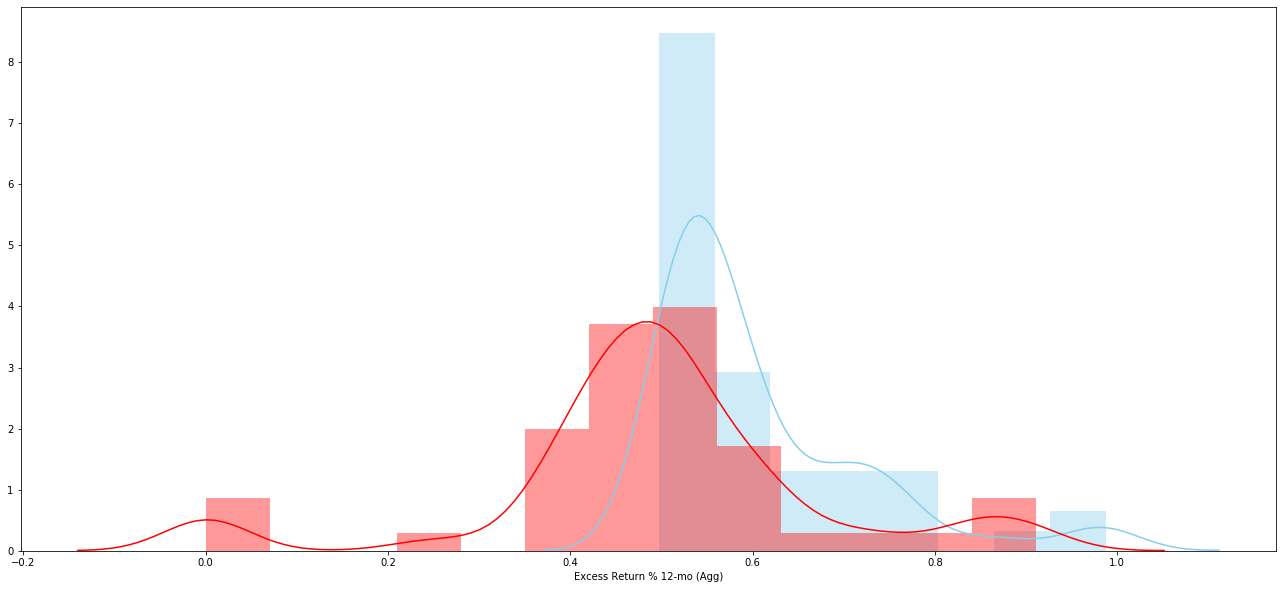

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Treasury)   50.0  0.570318  0.185639  0.026253   
 2                          combined  100.0  0.587523  0.154810  0.015481   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.517560  0.623076  
 2   0.556805  0.618240  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0344
 1                              Degrees of freedom =   98.0000
 2                                               t =    1.1127
 3                           Two side test p value =    0.2686
 4                          Difference < 0 p value =    0.8657
 5                          Difference > 0 p value =    0.1343
 6                                       Cohen's d =    0.2225
 7                                       Hedge's g =    0.2208
 8                

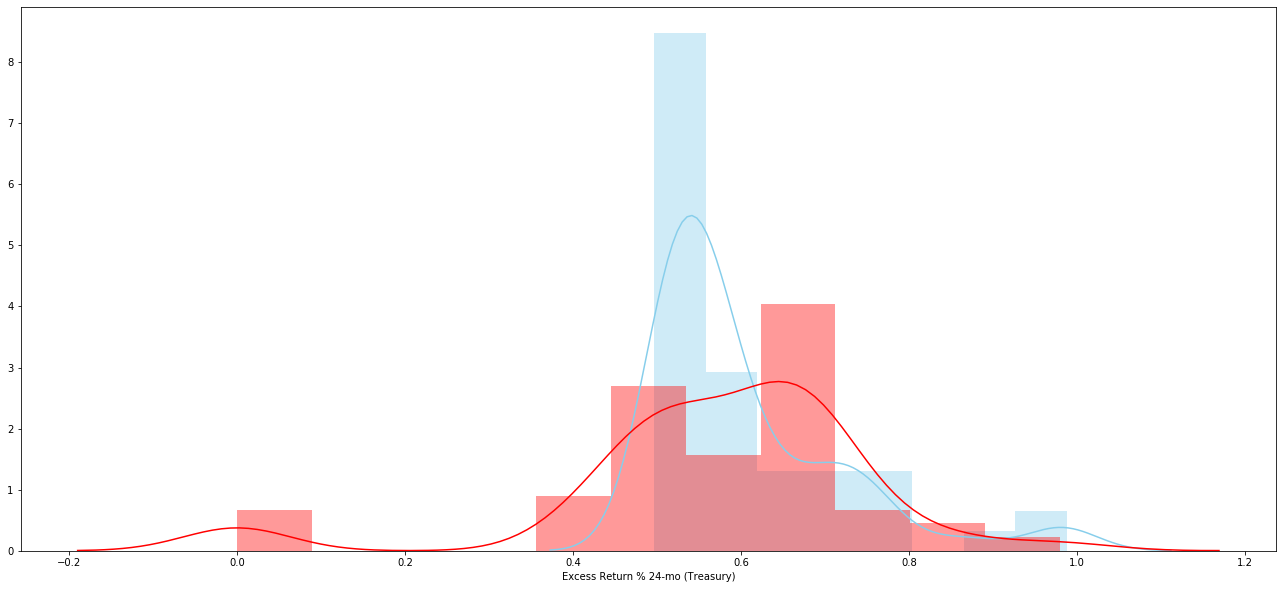

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Agg)   50.0  0.437922  0.190455  0.026934   
 2                     combined  100.0  0.521325  0.177735  0.017774   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.383796  0.492049  
 2   0.486058  0.556591  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1668
 1                              Degrees of freedom =   98.0000
 2                                               t =    5.2945
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.0589
 7                                       Hedge's g =    1.0508
 8                                   G

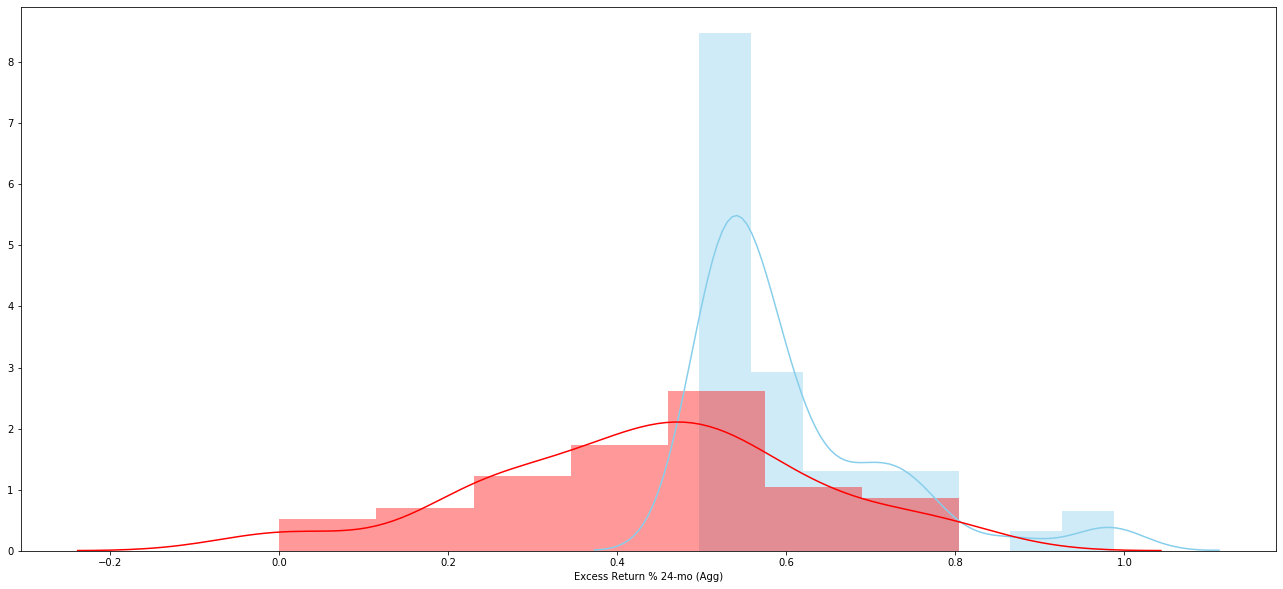

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Treasury)   50.0  0.629057  0.181546  0.025675   
 2                          combined  100.0  0.616892  0.151897  0.015190   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.577462  0.680652  
 2   0.586753  0.647032  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0243
 1                              Degrees of freedom =   98.0000
 2                                               t =   -0.7994
 3                           Two side test p value =    0.4260
 4                          Difference < 0 p value =    0.2130
 5                          Difference > 0 p value =    0.7870
 6                                       Cohen's d =   -0.1599
 7                                       Hedge's g =   -0.1587
 8                

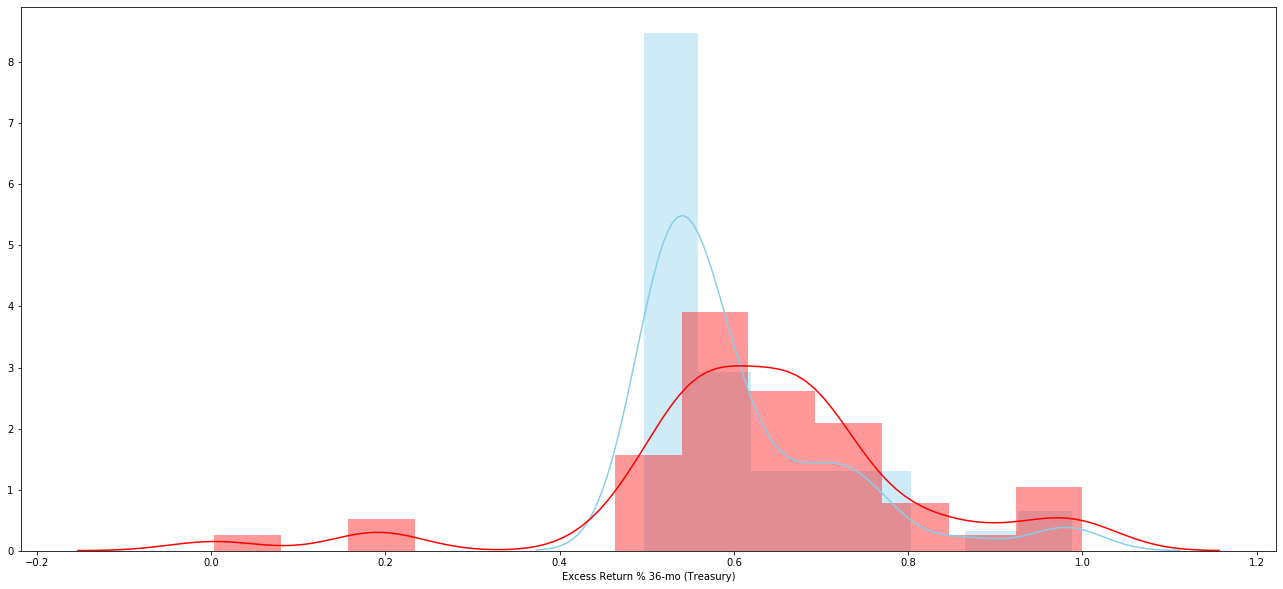

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Agg)   50.0  0.503970  0.187579  0.026528   
 2                     combined  100.0  0.554349  0.163062  0.016306   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.450660  0.557279  
 2   0.521994  0.586704  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1008
 1                              Degrees of freedom =   98.0000
 2                                               t =    3.2337
 3                           Two side test p value =    0.0017
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    0.6467
 7                                       Hedge's g =    0.6418
 8                                   G

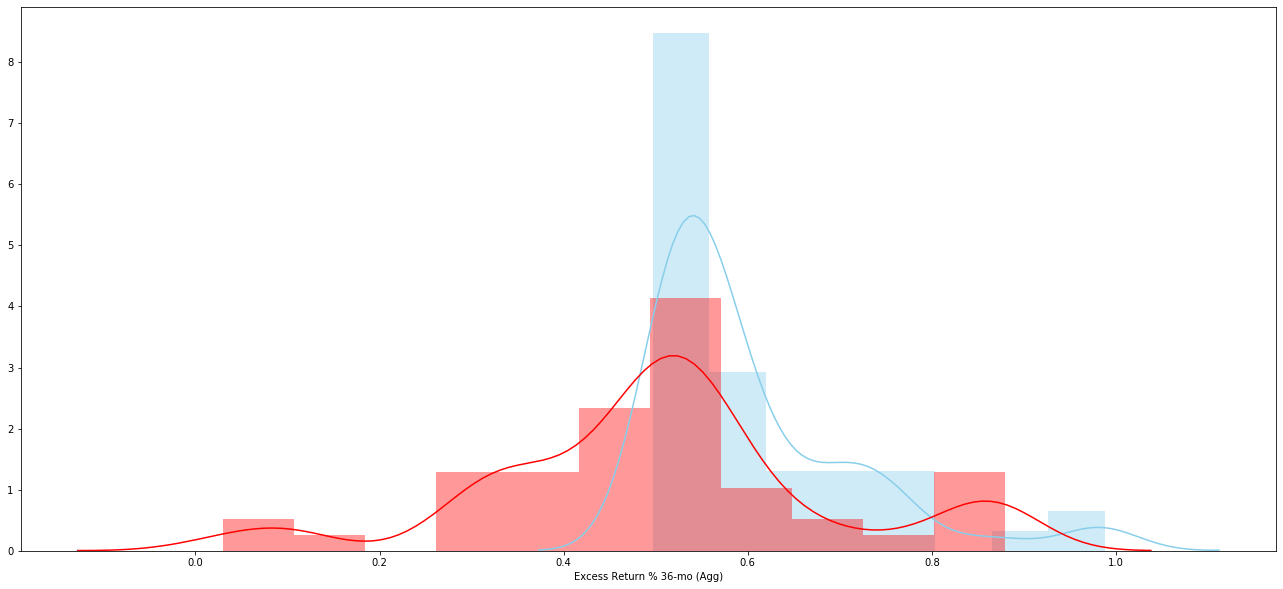

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.492726,0.501825,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250628,0.200742,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.495846,0.503522,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 3-mo (Treasury)  278.0  0.496887  0.250317  0.015013   
 2                         combined  328.0  0.513326  0.237879  0.013135   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.467333  0.526441  
 2   0.487487  0.539165  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1078
 1                              Degrees of freedom =   326.0000
 2                                               t =     2.9867
 3                           Two side test p value =     0.0030
 4                          Difference < 0 p value =     0.9985
 5                          Difference > 0 p value =     0.0015
 6                                       Cohen's d =     0.4588
 7                                       Hedge's g =     0.4577
 8           

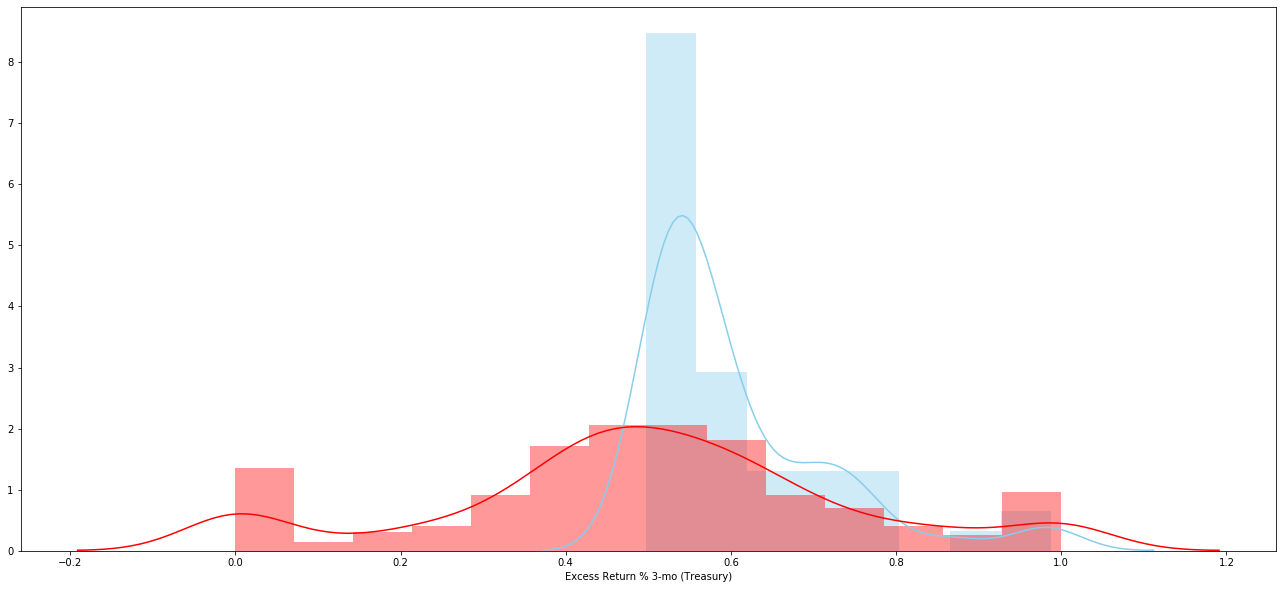

In [38]:
#df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 3-mo (Agg)  278.0  0.499424  0.183671  0.011016   0.477739   
 2                    combined  328.0  0.515477  0.178928  0.009880   0.496041   
 
    Interval  
 0  0.637571  
 1  0.521110  
 2  0.534912  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1053
 1                             Degrees of freedom =   326.0000
 2                                              t =     3.9142
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     0.9999
 5                         Difference > 0 p value =     0.0001
 6                                      Cohen's d =     0.6013
 7                                      Hedge's g =     0.5999
 8                                  Glass'

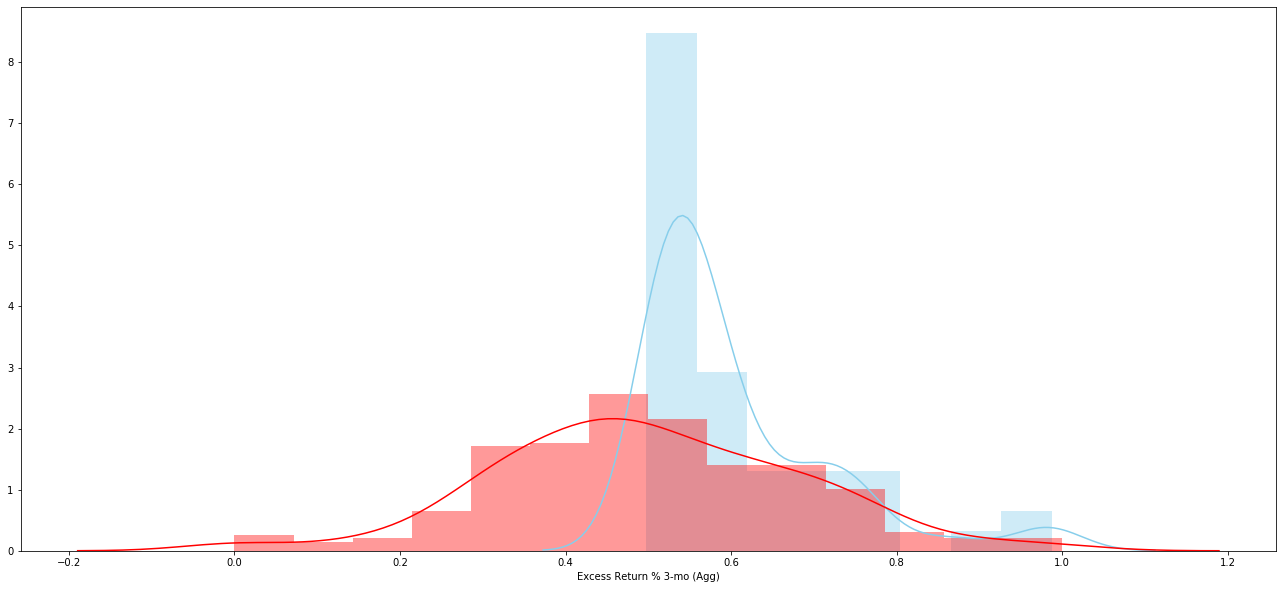

In [40]:
#df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 6-mo (Treasury)  275.0  0.470617  0.252012  0.015197   
 2                         combined  325.0  0.491250  0.240993  0.013368   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.440700  0.500535  
 2   0.464951  0.517549  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1341
 1                              Degrees of freedom =   323.0000
 2                                               t =     3.6894
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5672
 7                                       Hedge's g =     0.5659
 8           

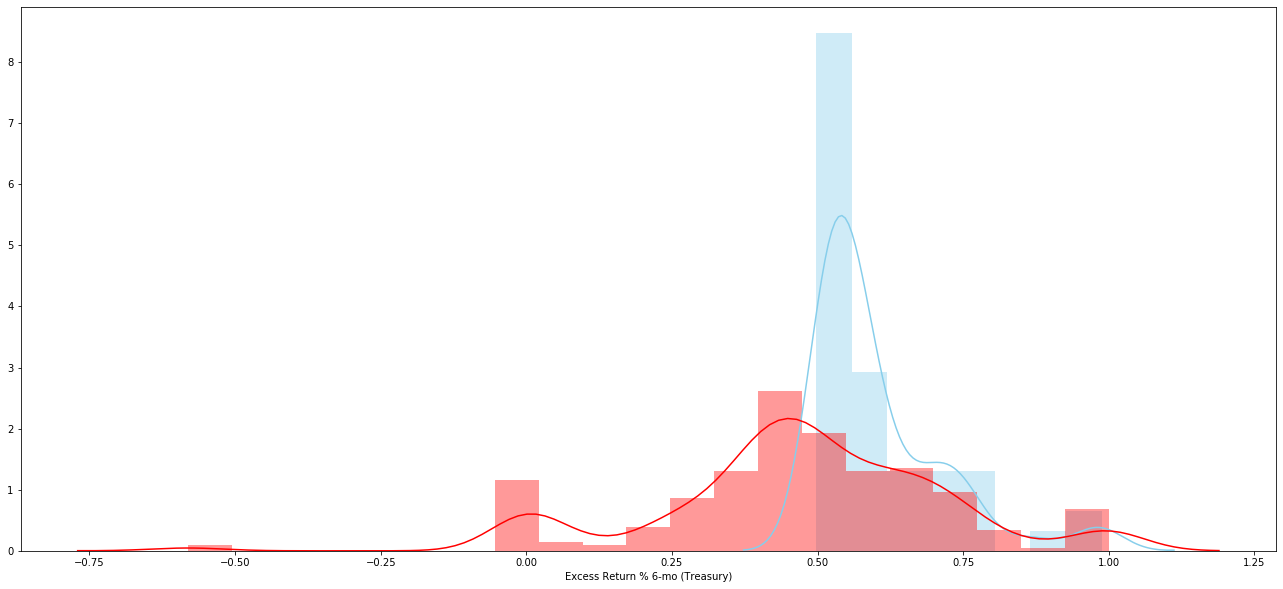

In [42]:
#df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 6-mo (Agg)  275.0  0.492462  0.194628  0.011736   0.469357   
 2                    combined  325.0  0.509733  0.188944  0.010481   0.489115   
 
    Interval  
 0  0.637571  
 1  0.515567  
 2  0.530352  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1123
 1                             Degrees of freedom =   323.0000
 2                                              t =     3.9509
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.6074
 7                                      Hedge's g =     0.6060
 8                                  Glass'

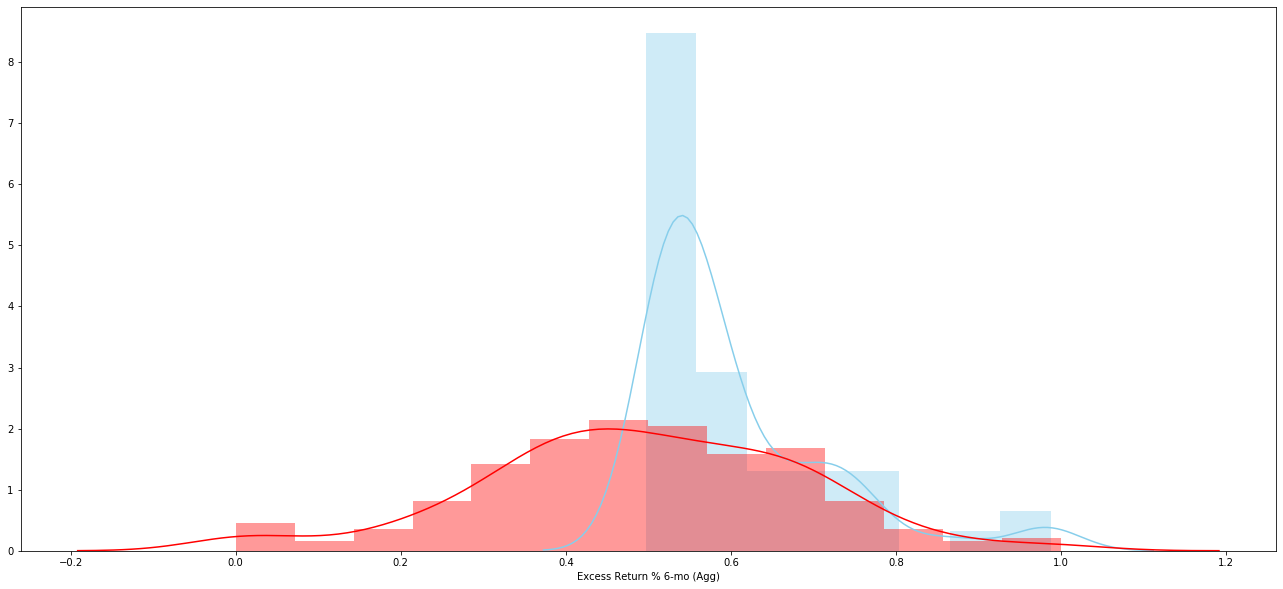

In [44]:
#df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 9-mo (Treasury)  272.0  0.480718  0.242491  0.014703   
 2                         combined  322.0  0.499974  0.231743  0.012915   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.451771  0.509665  
 2   0.474566  0.525382  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1240
 1                              Degrees of freedom =   320.0000
 2                                               t =     3.5396
 3                           Two side test p value =     0.0005
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.5446
 7                                       Hedge's g =     0.5434
 8           

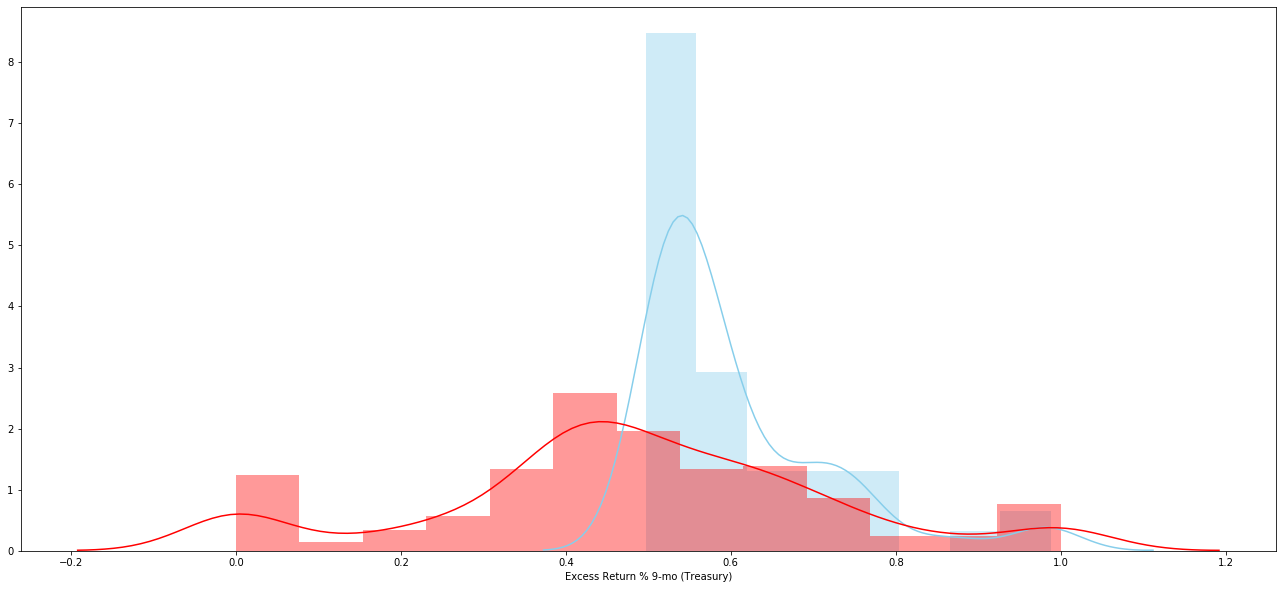

In [46]:
#df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   50.0  0.604727  0.115566  0.016344   0.571884   
 1  Excess Return % 9-mo (Agg)  272.0  0.500017  0.212772  0.012901   0.474618   
 2                    combined  322.0  0.516277  0.204209  0.011380   0.493887   
 
    Interval  
 0  0.637571  
 1  0.525416  
 2  0.538666  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1047
 1                             Degrees of freedom =   320.0000
 2                                              t =     3.3863
 3                          Two side test p value =     0.0008
 4                         Difference < 0 p value =     0.9996
 5                         Difference > 0 p value =     0.0004
 6                                      Cohen's d =     0.5211
 7                                      Hedge's g =     0.5198
 8                                  Glass'

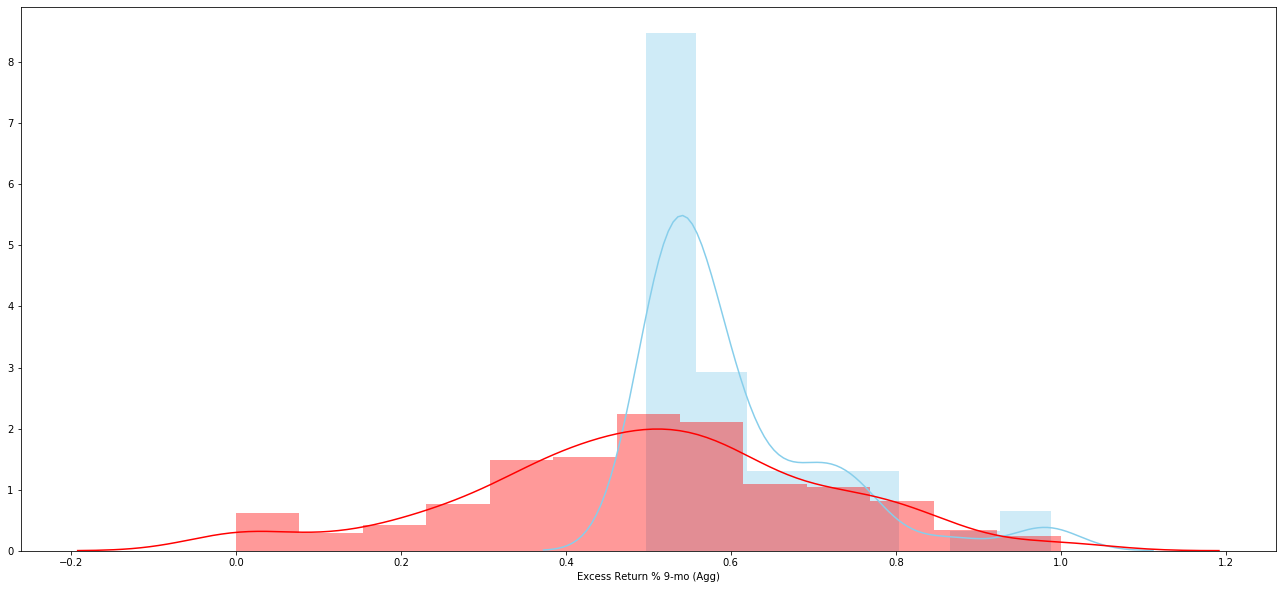

In [48]:
#df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Treasury)  269.0  0.489680  0.246996  0.015060   
 2                          combined  319.0  0.507712  0.235006  0.013158   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.460029  0.519330  
 2   0.481825  0.533600  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1150
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.2255
 3                           Two side test p value =     0.0014
 4                          Difference < 0 p value =     0.9993
 5                          Difference > 0 p value =     0.0007
 6                                       Cohen's d =     0.4967
 7                                       Hedge's g =     0.4956
 8       

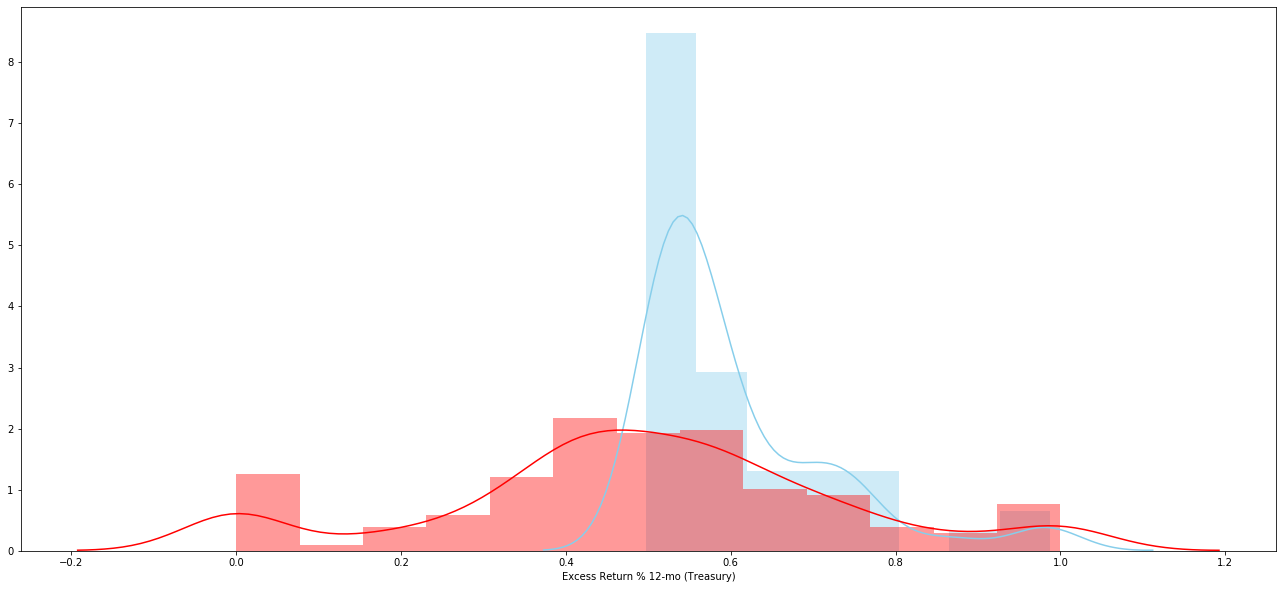

In [50]:
#df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 12-mo (Agg)  269.0  0.492247  0.213931  0.013044   
 2                     combined  319.0  0.509877  0.205684  0.011516   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.466566  0.517928  
 2   0.487220  0.532534  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1125
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.6178
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.5572
 7                                       Hedge's g =     0.5558
 8                           

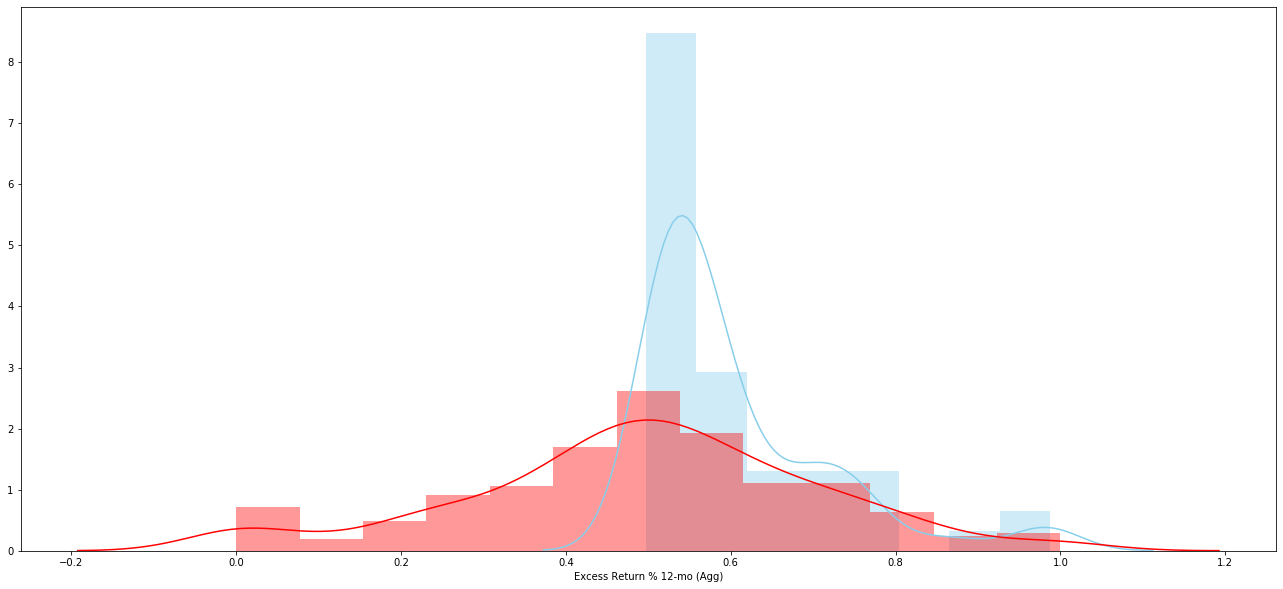

In [52]:
#df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Treasury)  257.0  0.481544  0.244801  0.015270   
 2                          combined  307.0  0.501606  0.233130  0.013305   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.451473  0.511615  
 2   0.475425  0.527788  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1232
 1                              Degrees of freedom =   305.0000
 2                                               t =     3.4800
 3                           Two side test p value =     0.0006
 4                          Difference < 0 p value =     0.9997
 5                          Difference > 0 p value =     0.0003
 6                                       Cohen's d =     0.5379
 7                                       Hedge's g =     0.5366
 8       

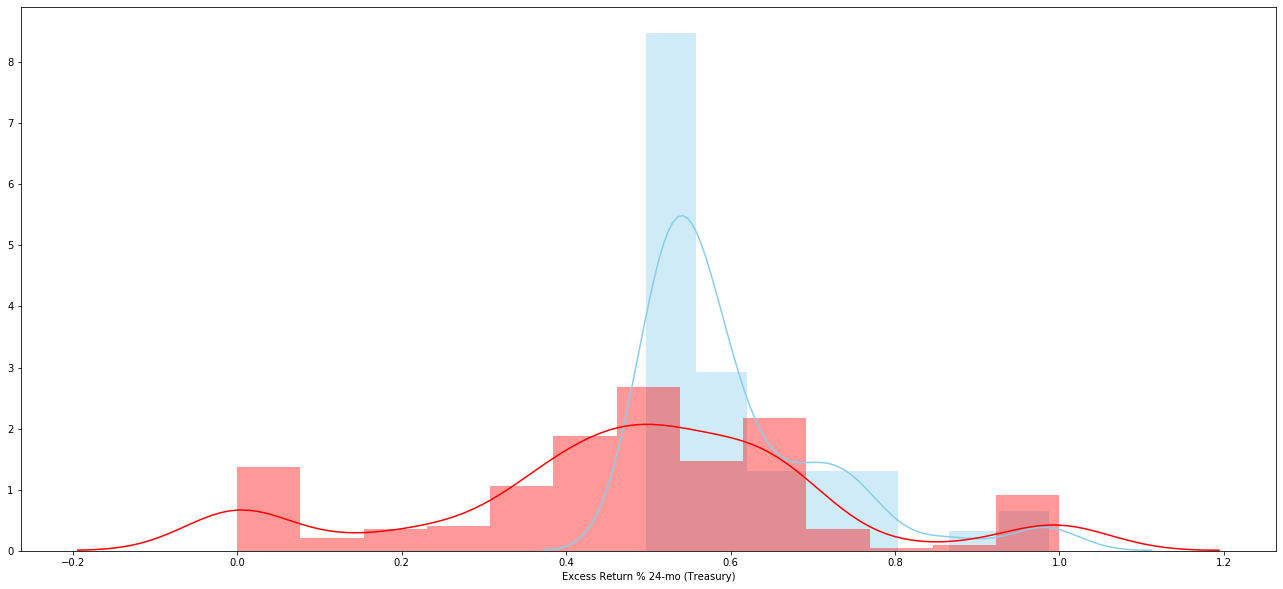

In [54]:
#df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 24-mo (Agg)  257.0  0.484984  0.213747  0.013333   
 2                     combined  307.0  0.504486  0.205724  0.011741   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.458727  0.511241  
 2   0.481382  0.527590  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1197
 1                              Degrees of freedom =   305.0000
 2                                               t =     3.8498
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5951
 7                                       Hedge's g =     0.5936
 8                           

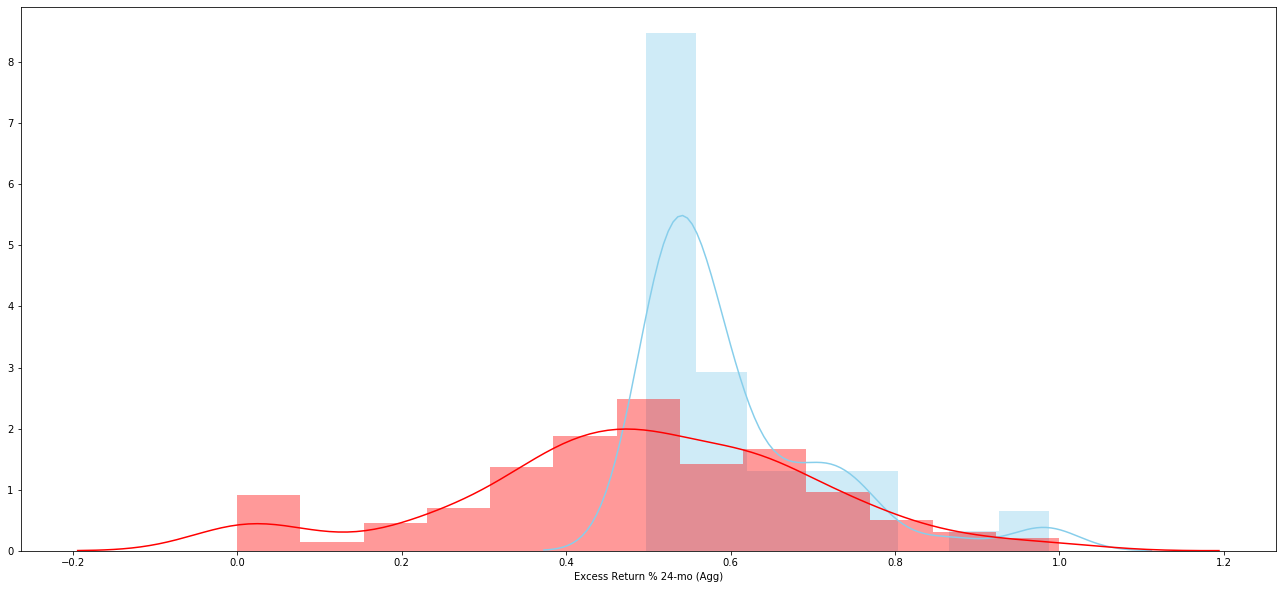

In [56]:
#df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Treasury)  245.0  0.495937  0.269899  0.017243   
 2                          combined  295.0  0.514376  0.253682  0.014770   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.461972  0.529901  
 2   0.485308  0.543444  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1088
 1                              Degrees of freedom =   293.0000
 2                                               t =     2.7953
 3                           Two side test p value =     0.0055
 4                          Difference < 0 p value =     0.9972
 5                          Difference > 0 p value =     0.0028
 6                                       Cohen's d =     0.4338
 7                                       Hedge's g =     0.4327
 8       

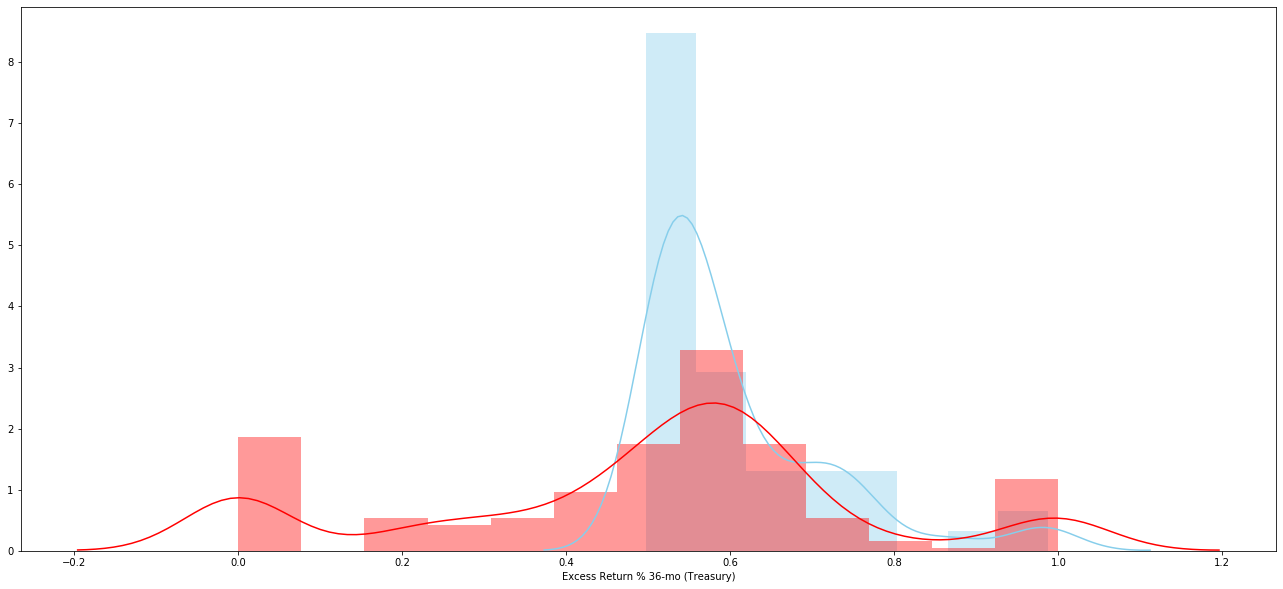

In [58]:
#df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
#df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   50.0  0.604727  0.115566  0.016344   
 1  Excess Return % 36-mo (Agg)  245.0  0.532766  0.216243  0.013815   
 2                     combined  295.0  0.544963  0.204367  0.011899   
 
    95% Conf.  Interval  
 0   0.571884  0.637571  
 1   0.505554  0.559978  
 2   0.521545  0.568380  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.0720
 1                              Degrees of freedom =   293.0000
 2                                               t =     2.2853
 3                           Two side test p value =     0.0230
 4                          Difference < 0 p value =     0.9885
 5                          Difference > 0 p value =     0.0115
 6                                       Cohen's d =     0.3546
 7                                       Hedge's g =     0.3537
 8                           

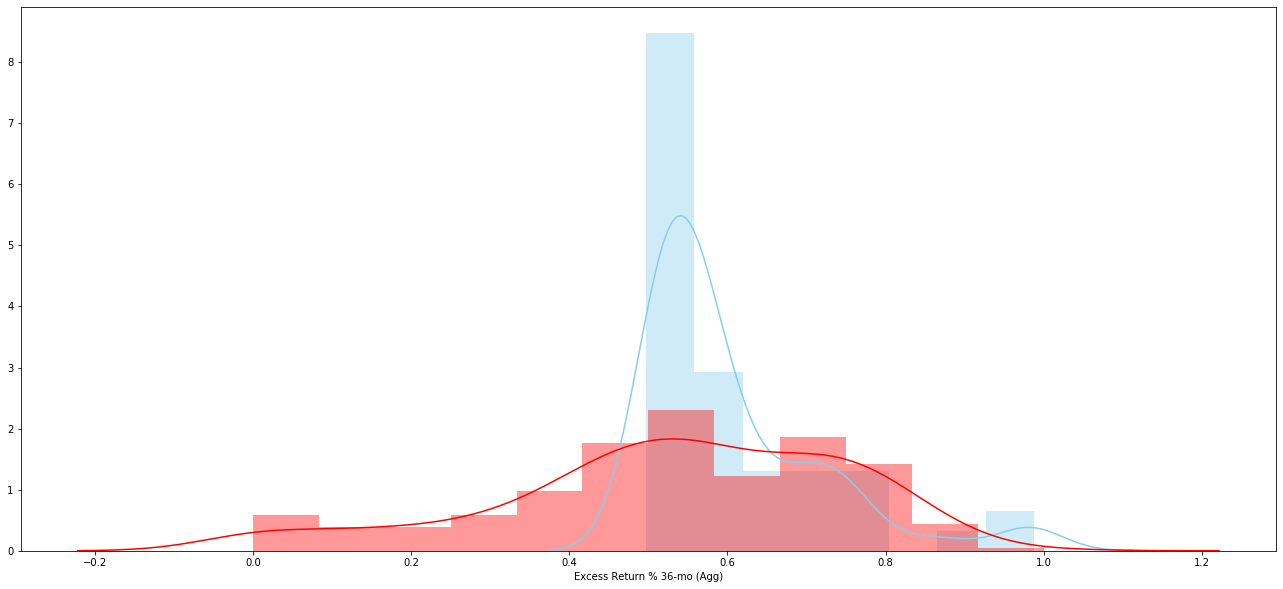

In [60]:
#df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
#df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")